In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2] # to get the middle point of the array
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

In [2]:
print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


In [3]:
x = [3,6,8,10,1,2,1]

In [4]:
x.sort()

In [5]:
x

[1, 1, 2, 3, 6, 8, 10]

In [6]:
import numpy as np

In [7]:
e = np.random.random((2,2))  # Create an array filled with random values
print(e)

[[0.27744184 0.24446416]
 [0.22205717 0.38001926]]


In [8]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


## 1. Set up our environment in Jupyter

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr

## 2. Get data from Yahoo! for AMZN and GOOG

In [12]:
amzn = pdr.get_data_yahoo("AMZN", "20121101")
goog = pdr.get_data_yahoo("GOOG", "2012-11-01")

## 3. View head, tail and info

In [14]:
amzn.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-01,234.550003,231.339996,234.229996,232.139999,3905100,232.139999
2012-11-02,237.399994,232.110001,234.009995,232.419998,3374700,232.419998
2012-11-05,234.830002,230.110001,232.039993,234.330002,1846100,234.330002
2012-11-06,237.750000,234.449997,235.410004,237.559998,2661300,237.559998
2012-11-07,235.660004,229.419998,235.649994,232.059998,3624200,232.059998
2012-11-08,233.449997,227.100006,232.220001,227.350006,2982400,227.350006
2012-11-09,230.970001,224.600006,226.259995,226.309998,3092500,226.309998
2012-11-12,229.220001,225.410004,226.589996,226.470001,2128800,226.470001
2012-11-13,227.899994,224.710007,225.119995,226.600006,2629800,226.600006


In [16]:
amzn.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-19,1826.000000,1812.609985,1818.079956,1816.119995,2816300,1816.119995
2019-08-20,1816.819946,1799.880005,1814.500000,1801.380005,1929500,1801.380005
2019-08-21,1829.579956,1815.000000,1819.390015,1823.540039,2031800,1823.540039
2019-08-22,1829.410034,1800.099976,1828.000000,1804.660034,2653500,1804.660034
2019-08-23,1804.900024,1745.229980,1793.030029,1749.619995,5270800,1749.619995
2019-08-26,1770.000000,1743.510010,1766.910034,1768.869995,3080000,1768.869995
2019-08-27,1779.400024,1746.680054,1775.729980,1761.829956,3019700,1761.829956
2019-08-28,1767.859985,1744.050049,1755.000000,1764.250000,2419700,1764.250000
2019-08-29,1798.550049,1777.250000,1783.000000,1786.400024,3015100,1786.400024


In [18]:
print(amzn.info(), goog.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1719 entries, 2012-11-01 to 2019-08-30
Data columns (total 6 columns):
High         1719 non-null float64
Low          1719 non-null float64
Open         1719 non-null float64
Close        1719 non-null float64
Volume       1719 non-null int64
Adj Close    1719 non-null float64
dtypes: float64(5), int64(1)
memory usage: 94.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1719 entries, 2012-11-01 to 2019-08-30
Data columns (total 6 columns):
High         1719 non-null float64
Low          1719 non-null float64
Open         1719 non-null float64
Close        1719 non-null float64
Volume       1719 non-null float64
Adj Close    1719 non-null float64
dtypes: float64(6)
memory usage: 94.0 KB
None None


## 4. Filtering data using .loc, .iloc, index

In [62]:
amzn["Open"]

Date
2012-11-01     234.229996
2012-11-02     234.009995
2012-11-05     232.039993
2012-11-06     235.410004
2012-11-07     235.649994
2012-11-08     232.220001
2012-11-09     226.259995
2012-11-12     226.589996
2012-11-13     225.119995
2012-11-14     226.500000
2012-11-15     222.300003
2012-11-16     221.309998
2012-11-19     228.320007
2012-11-20     230.000000
2012-11-21     233.839996
2012-11-23     239.889999
2012-11-26     240.389999
2012-11-27     243.220001
2012-11-28     242.449997
2012-11-29     248.050003
2012-11-30     250.380005
2012-12-03     252.539993
2012-12-04     249.940002
2012-12-05     252.440002
2012-12-06     253.000000
2012-12-07     254.139999
2012-12-10     253.100006
2012-12-11     248.500000
2012-12-12     251.070007
2012-12-13     251.110001
                 ...     
2019-07-22    1971.140015
2019-07-23    1995.989990
2019-07-24    1969.300049
2019-07-25    2001.000000
2019-07-26    1942.000000
2019-07-29    1930.000000
2019-07-30    1891.119995
2019-07

In [25]:
amzn.loc["20121101","Open"]

234.22999572753906

In [26]:
amzn.iloc[0,1]

231.33999633789062

In [28]:
amzn[amzn.index > "20171101"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-02,1101.939941,1086.869995,1097.810059,1094.219971,3684900,1094.219971
2017-11-03,1112.680054,1088.520020,1091.150024,1111.599976,3751500,1111.599976
2017-11-06,1125.410034,1108.770020,1109.150024,1120.660034,3381100,1120.660034
2017-11-07,1130.599976,1117.500000,1124.739990,1123.170044,2689000,1123.170044
2017-11-08,1135.540039,1119.109985,1122.819946,1132.880005,2581500,1132.880005
2017-11-09,1129.619995,1115.770020,1125.959961,1129.130005,3732700,1129.130005
2017-11-10,1131.750000,1124.060059,1126.099976,1125.349976,2179900,1125.349976
2017-11-13,1139.900024,1122.339966,1123.000000,1129.170044,2918400,1129.170044
2017-11-14,1138.000000,1123.890015,1130.109985,1136.839966,3138400,1136.839966


## 5. Filtering with criteria

In [29]:
print("Mean: %.3f   Std: %.3f"% (amzn["Volume"].mean(), amzn["Volume"].std()))

Mean: 4028178.010   Std: 2257808.980


In [30]:
high = amzn["Volume"].mean() + 2* amzn["Volume"].std()

In [71]:
len(amzn[amzn.Volume > high]) / len(amzn) #how many days are considered high volume on AMZN stock

0.04595695171611402

## 6. Adding Columns 

In [32]:
amzn["pct_chng"] = amzn.Close.pct_change()

In [33]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,pct_chng
Date,,,,,,,
2012-11-01,234.550003,231.339996,234.229996,232.139999,3905100,232.139999,NaN
2012-11-02,237.399994,232.110001,234.009995,232.419998,3374700,232.419998,0.001206
2012-11-05,234.830002,230.110001,232.039993,234.330002,1846100,234.330002,0.008218
2012-11-06,237.750000,234.449997,235.410004,237.559998,2661300,237.559998,0.013784
2012-11-07,235.660004,229.419998,235.649994,232.059998,3624200,232.059998,-0.023152


## 7. Appending Data

In [36]:
goog_11 = goog.loc["2017-11"]
amzn_11 = amzn.loc["2017-11"]

In [39]:
goog_11.append(amzn_11).tail()

,Adj Close,Close,High,Low,Open,Volume,pct_chng
Date,,,,,,,
2017-11-24,1186.000000,1186.000000,1186.839966,1160.699951,1160.699951,3528000.0,0.025810
2017-11-27,1195.829956,1195.829956,1213.410034,1191.150024,1202.660034,6744000.0,0.008288
2017-11-28,1193.599976,1193.599976,1205.339966,1188.520020,1204.880005,4559400.0,-0.001865
2017-11-29,1161.270020,1161.270020,1194.800049,1145.189941,1194.800049,9257500.0,-0.027086
2017-11-30,1176.750000,1176.750000,1178.569946,1160.000000,1167.099976,4509200.0,0.013330


## 8. Merging Columns from Different DataFrames 

In [40]:
close = pd.DataFrame({"AMZN" : amzn.Close, "GOOG" : goog.Close})
close.head()

,AMZN,GOOG
Date,,
2012-11-01,232.139999,342.511169
2012-11-02,232.419998,342.675568
2012-11-05,234.330002,340.204834
2012-11-06,237.559998,339.587158
2012-11-07,232.059998,332.314392


## 9. Grouping and sorting data

In [41]:
goog.groupby(["Open"]).sum()

,High,Low,Close,Volume,Adj Close
Open,,,,,
321.788849,325.290741,316.812500,322.381622,6902000.0,322.381622
323.786377,328.767700,320.747772,322.421478,3711500.0,322.421478
326.102692,332.922119,323.935822,330.277039,6251500.0,330.277039
326.625732,333.211029,326.541046,332.857361,4754100.0,332.857361
328.852386,336.239685,327.771423,334.102692,5036100.0,334.102692
329.096466,329.853638,324.035431,325.056610,3349200.0,325.056610
330.262085,332.553497,327.886017,328.294464,3200200.0,328.294464
330.635681,333.649414,329.201080,331.706696,2822300.0,331.706696
331.975677,332.254639,328.279541,329.340546,4425700.0,329.340546


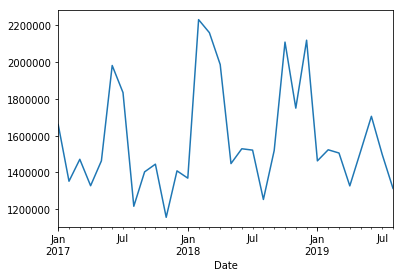

In [44]:
goog["Volume"][goog.index > "2017"].resample("M").mean().plot()

## 10. Cumulative Sum and Rolling Calculations

In [45]:
amzn_change = np.log(amzn.Close / amzn.Close.shift(1))
goog_change = np.log(goog.Close / goog.Close.shift(1))

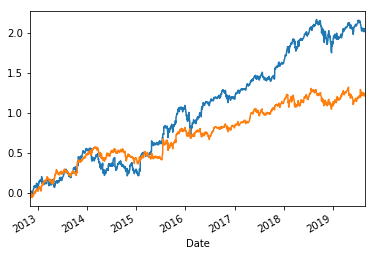

In [74]:
amzn_change.cumsum().plot()
goog_change.cumsum().plot()

## 11. Create new DataFrame and save to CSV

In [55]:
new = pd.DataFrame({"AMZN": amzn_change[1:], "GOOG": goog_change[1:]})
new.to_csv("Stocks.csv")

In [56]:
pd.read_csv("Stocks.csv").head()

,Date,AMZN,GOOG
0,2012-11-02,0.001205,0.000480
1,2012-11-05,0.008184,-0.007236
2,2012-11-06,0.013690,-0.001817
3,2012-11-07,-0.023424,-0.021649
4,2012-11-08,-0.020505,-0.022481


## 12. Change the index and remove columns

In [57]:
new_stocks = pd.read_csv("Stocks.csv")
new_stocks.index = new_stocks.Date
new_stocks.head()

,Date,AMZN,GOOG
Date,,,
2012-11-02,2012-11-02,0.001205,0.000480
2012-11-05,2012-11-05,0.008184,-0.007236
2012-11-06,2012-11-06,0.013690,-0.001817
2012-11-07,2012-11-07,-0.023424,-0.021649
2012-11-08,2012-11-08,-0.020505,-0.022481


In [60]:
new_stocks.drop(["Date"], axis=1, inplace=True)
new_stocks.head()

,AMZN,GOOG
Date,,
2012-11-02,0.001205,0.000480
2012-11-05,0.008184,-0.007236
2012-11-06,0.013690,-0.001817
2012-11-07,-0.023424,-0.021649
2012-11-08,-0.020505,-0.022481


## 13. Rename Columns

In [61]:
new_stocks.rename(columns={"AMZN": "AMZN_chng"}, inplace=True)
new_stocks.head()

,AMZN_chng,GOOG
Date,,
2012-11-02,0.001205,0.000480
2012-11-05,0.008184,-0.007236
2012-11-06,0.013690,-0.001817
2012-11-07,-0.023424,-0.021649
2012-11-08,-0.020505,-0.022481
